# ruim mas funcionando

In [68]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

# Get the data for the ^BVSP stock index
data = yf.download("^BVSP", start="2000-01-01", end="2022-12-31")

# Calculate the moving averages
data["50ma"] = data["Close"].rolling(window=50, min_periods=0).mean()
data["200ma"] = data["Close"].rolling(window=200, min_periods=0).mean()

# Create the input data by dropping unnecessary columns
X = data.drop(["Close", "Adj Close", "Volume"], axis=1)

# Scale the input data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Define the output data
y = data["Close"]

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for use with LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and fit the model
model.compile(loss="mean_squared_error", optimizer="adam")
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=[early_stop])

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse the scaling for predictions
# predictions = scaler.inverse_transform(predictions)

# Compare the predictions to the actual values
for i in range(len(predictions)):
    print("Predicted: ", predictions[i], " Actual: ", y_test.values[i])



[*********************100%***********************]  1 of 1 completed
Epoch 1/100
4553/4553 [==============================] - 9s 2ms/step - loss: 1594154112.0000
Epoch 2/100
4553/4553 [==============================] - 7s 1ms/step - loss: 266863680.0000
Epoch 3/100
4553/4553 [==============================] - 7s 1ms/step - loss: 21534694.0000
Epoch 4/100
4553/4553 [==============================] - 7s 1ms/step - loss: 5458191.0000
Epoch 5/100
4553/4553 [==============================] - 7s 1ms/step - loss: 1757263.5000
Epoch 6/100
4553/4553 [==============================] - 7s 1ms/step - loss: 846341.3125
Epoch 7/100
4553/4553 [==============================] - 7s 1ms/step - loss: 577726.8750
Epoch 8/100
4553/4553 [==============================] - 7s 1ms/step - loss: 474369.8125
Epoch 9/100
4553/4553 [==============================] - 7s 1ms/step - loss: 416770.9062
Epoch 10/100
4553/4553 [==============================] - 7s 1ms/step - loss: 388443.4375
Epoch 11/100
4553/4553 [=====

Predicted:  77096.56  Actual:  75356.0
Buy
Predicted:  77018.414  Actual:  76072.0
Buy
Predicted:  76855.77  Actual:  76754.0
Buy
Predicted:  77340.44  Actual:  77240.0
Buy
Predicted:  78656.41  Actual:  78596.0
Buy
Predicted:  77900.555  Actual:  76642.0
Buy
Predicted:  76610.17  Actual:  76117.0
Buy
Predicted:  73301.13  Actual:  73851.0
Sell
Predicted:  72997.8  Actual:  72942.0
Buy
Predicted:  73177.34  Actual:  72308.0
Buy
Predicted:  73301.945  Actual:  72754.0
Buy
Predicted:  72228.97  Actual:  72122.0
Buy
Predicted:  72446.29  Actual:  71421.0
Buy
Predicted:  70686.125  Actual:  70758.0
Sell
Predicted:  70322.22  Actual:  69815.0
Buy
Predicted:  71222.88  Actual:  71394.0
Sell
Predicted:  72488.92  Actual:  72123.0
Buy
Predicted:  71257.01  Actual:  70075.0
Buy
Predicted:  71086.84  Actual:  70641.0
Buy
Predicted:  70993.75  Actual:  70953.0
Buy
Predicted:  71361.375  Actual:  71405.0
Sell
Predicted:  71440.07  Actual:  70609.0
Buy
Predicted:  71922.42  Actual:  71767.0
Buy
Pre

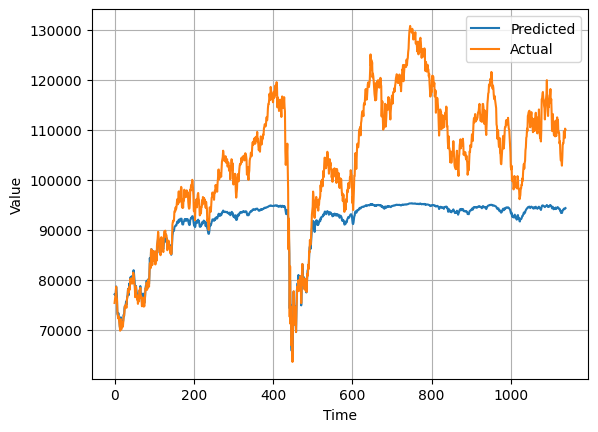

In [110]:
import matplotlib.pyplot as plt

# Initialize variables to keep track of buying and selling
cash = 1000
shares = 0
profit = []

# Compare the predictions to the actual values and decide to buy, sell, or hold
for i in range(len(predictions)):
    print("Predicted: ", predictions[i][0], " Actual: ", y_test.values[i])
    if predictions[i][0] > y_test.values[i]:
        print("Buy")
        if cash > 0:
            shares += cash / y_test.values[i]
            cash = 0
    elif predictions[i][0] < y_test.values[i]:
        print("Sell")
        if shares > 0:
            cash += shares * y_test.values[i]
            shares = 0
    else:
        print("Hold")
    profit.append(cash + shares * y_test.values[i])

# Plot the predictions and the actual values
plt.plot(predictions, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


# "segunda" tentativa

In [128]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

# Get the data for the ^BVSP stock index
data = yf.download("^BVSP", start="2000-01-01", end="2022-12-31")

# Calculate the moving averages
data["50ma"] = data["Close"].rolling(window=50, min_periods=0).mean()
data["200ma"] = data["Close"].rolling(window=200, min_periods=0).mean()

# Calculate the technical indicators
data["RSI"] = relative_strength_index(data["Close"],14)
data["macd"] = macd(data["Close"], 12, 26)


# Create the input data by dropping unnecessary columns
X = data.drop(["Close", "Adj Close", "Volume"], axis=1)

# Scale the input data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Define the output data
y = data["Close"]

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for use with LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile and fit the model
model.compile(loss="mean_squared_error", optimizer="adam")
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=[early_stop])

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse the scaling for predictions
# predictions = scaler.inverse_transform(predictions)

# Compare the predictions to the actual values
for i in range(len(predictions)):
    print("Predicted: ", predictions[i], " Actual: ", y_test.values[i])



[*********************100%***********************]  1 of 1 completed
Epoch 1/100
4553/4553 [==============================] - 9s 1ms/step - loss: nan
Epoch 2/100
1897/4553 [===========>..................] - ETA: 4s - loss: nan

KeyboardInterrupt: 

[*********************100%***********************]  1 of 1 completed
Epoch 1/10000
143/143 [==============================] - 4s 9ms/step - loss: 2325358080.0000
Epoch 2/10000
143/143 [==============================] - 1s 9ms/step - loss: 2312647680.0000
Epoch 3/10000
143/143 [==============================] - 1s 9ms/step - loss: 2292623360.0000
Epoch 4/10000
143/143 [==============================] - 1s 9ms/step - loss: 2264803072.0000
Epoch 5/10000
143/143 [==============================] - 1s 9ms/step - loss: 2229529344.0000
Epoch 6/10000
143/143 [==============================] - 1s 9ms/step - loss: 2187652096.0000
Epoch 7/10000
143/143 [==============================] - 1s 9ms/step - loss: 2139184896.0000
Epoch 8/10000
143/143 [==============================] - 1s 9ms/step - loss: 2085559808.0000
Epoch 9/10000
143/143 [==============================] - 1s 9ms/step - loss: 2026733696.0000
Epoch 10/10000
143/143 [==============================] - 1s 9ms/step - loss: 1964433280.0000


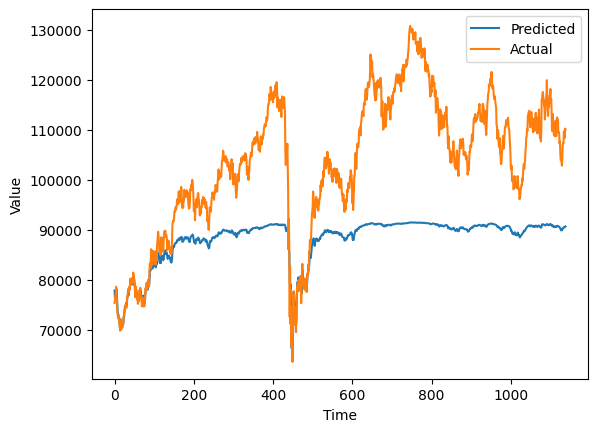

In [132]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from pyti.relative_strength_index import relative_strength_index
from pyti.moving_average_convergence_divergence import moving_average_convergence_divergence as macd


# Get the data for the ^BVSP stock index
data = yf.download("^BVSP", start="2000-01-01", end="2022-12-31")

# Calculate the moving averages
data["50ma"] = data["Close"].rolling(window=50, min_periods=0).mean()
data["200ma"] = data["Close"].rolling(window=200, min_periods=0).mean()

# Create the lookback window
lookback_window = 60
for i in range(1, lookback_window + 1):
    data[f"Close_lag_{i}"] = data["Close"].shift(i)

# Create the input data by dropping unnecessary columns
X = data.drop(["Close", "Adj Close", "Volume"], axis=1)

# Scale the input data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Define the output data
y = data["Close"]

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for use with LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(500, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile and fit the model
model.compile(loss="mean_squared_error", optimizer="adam")
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='loss', mode='min')
model.fit(X_train, y_train, batch_size=32, epochs=10000, callbacks=[early_stop, checkpoint])

# Load the best model
model.load_weights("best_model.h5")

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse the scaling for predictions
# predictions = scaler.inverse_transform(predictions)

# Compare the predictions to the actual values and decide to buy, sell, or hold
for i in range(len(predictions)):
    print("Predicted: ", predictions[i][0], " Actual: ", y_test.values[i])
    if predictions[i][0] > y_test.values[i]:
        print("Buy")
    if cash > 0:
        shares += cash / y_test.values[i]
        cash = 0
    elif predictions[i][0] < y_test.values[i]:
        print("Sell")
    if shares > 0:
        cash += shares * y_test.values[i]
        shares = 0
    else:
        print("Hold")
    profit.append(cash + shares * y_test.values[i])

# Plot the predictions and the actual values
plt.plot(predictions, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()
